# **Introduction: Visualisation in Python**

Data visualisation is an essential part of data analysis. It helps transform raw data into insightful charts and graphs that are easier to interpret and communicate. Python offers a variety of powerful libraries that allow users to create both static and interactive visualisations with ease and flexibility.

In this notebook, we explore how to use Python's visualisation tools to gain insights from a real-world dataset that tracks the number of airline passengers over time. The goal is to help you understand how to visualise trends, comparisons, distributions, and relationships within the data using various types of charts.

### 🧰 Libraries Used for Visualisation

- **Matplotlib**  
  A foundational plotting library in Python that enables the creation of high-quality static, animated, and interactive visualisations. It offers fine-grained control over all elements of a plot.

- **Seaborn**  
  Built on top of Matplotlib, Seaborn makes it easier to create visually appealing and informative statistical graphics. It integrates well with pandas DataFrames and provides convenient functions for common plot types.

- **Plotly**  
  A modern graphing library that enables interactive visualisations. It allows users to zoom, pan, and hover over charts, making it ideal for web applications and dashboards.

- **NumPy**  
  Although not a visualisation library, NumPy is a fundamental package for numerical operations. It supports array-based computation and is used for trendline analysis in scatter plots.

Together, these libraries offer a complete toolkit for visualising data effectively in Python.


## 📌 Learning Objectives

By the end of this notebook, you will be able to:

- Import and use `pandas`, `matplotlib`, `seaborn`, `numpy`, and `plotly` for data visualisation.
- Create a variety of chart types such as bar charts, line plots, scatter plots, heatmaps, stacked charts, histograms, and interactive plots.
- Generate summary statistics using pivot tables and visualise aggregated results effectively.


## 📚 Introduction to Libraries

### Matplotlib
`matplotlib` is a foundational library for creating static, animated, and interactive visualisations in Python. It is highly customisable and forms the base of many other plotting libraries.

### Seaborn
`seaborn` is built on top of `matplotlib` and provides a high-level interface for drawing attractive and informative statistical graphics.

### NumPy
`numpy` is the core library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a variety of mathematical functions to operate on these arrays.

### Plotly
`plotly` is a graphing library that enables interactive plots and dashboards. It is especially useful for creating web-ready and visually appealing charts.

In this notebook, we use all of these libraries to explore and visualise the flights dataset in various ways.

# Visualising Flights Data
This notebook replicates Day 4 visualisation types using the flights dataset.

# Importing the required **libraries**

### 📊 Explanation  
This code block loads the **flights dataset**, formats the data for proper time-based analysis, and displays the first few rows. The goal is to ensure the dataset is structured correctly for visualisation and time series plotting.

Let’s walk through each step:

- `import pandas as pd`, `import matplotlib.pyplot as plt`, `import seaborn as sns`, `import numpy as np`  
  These are essential Python libraries for data handling and visualisation:
  - `pandas` is used for data manipulation and analysis.
  - `matplotlib.pyplot` provides tools for plotting static charts.
  - `seaborn` builds on Matplotlib to offer higher-level, attractive statistical plots.
  - `numpy` is used for numerical operations, such as fitting trend lines.

- `flights_df = pd.read_csv("flights.csv")`  
  Loads the dataset from a CSV file into a pandas DataFrame called `flights_df`. This dataset typically contains three columns: `year`, `month`, and `passengers`.

- `flights_df['month'] = pd.Categorical(...)`  
  Converts the `month` column into an **ordered categorical variable**:
  - This is important because, by default, pandas may sort months **alphabetically**, not chronologically.
  - The `categories` argument explicitly defines the correct calendar order from January to December.
  - `ordered=True` ensures the DataFrame respects this logical sequence in sorting and plotting.

- `flights_df.sort_values(['year', 'month'], inplace=True)`  
  Sorts the DataFrame first by `year`, then by `month`, in ascending order. This is critical for any **time series visualisations**, ensuring that data points are in correct chronological sequence.

- `flights_df.head()`  
  Displays the **first five rows** of the DataFrame. This allows you to preview the cleaned and sorted data before proceeding with analysis or visualisation.

### ✅ Why This Step Is Important:
- It ensures the dataset is **clean, well-ordered, and ready for plotting**.
- Prevents common issues like months appearing out of order in charts.
- Gives you a chance to **verify the structure** of the data before building visualisations.

This preparation step is a best practice before any time-based data analysis.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
flights_df = pd.read_csv("flights.csv")
flights_df['month'] = pd.Categorical(flights_df['month'],
                                     categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                 'July', 'August', 'September', 'October', 'November', 'December'],
                                     ordered=True)
flights_df.sort_values(['year', 'month'], inplace=True)
flights_df.head()

# Column **Chart**

### 📊 Explanation

The first bar chart shows the **total number of passengers per year**, created using pandas' built-in `.plot()` function.

- A pivot table is used to **sum passengers by year**.
- `plot(kind='bar')` generates a vertical bar chart without needing Matplotlib or Seaborn.
- Axis labels and title are added directly as arguments.

This quick and simple method is ideal for basic visual analysis using only pandas.


The second bar chart displays the number of passengers for each month in **1949**, sorted in **descending order** by passenger count.

- The dataset is filtered for the year 1949 and sorted from highest to lowest passenger values.
- `tolist()` converts the `month` and `passengers` columns into standard Python lists for plotting.
- `plt.bar()` creates the bar chart, with months on the x-axis and passenger numbers on the y-axis.
- `plt.xticks(rotation=45)` improves readability of month labels.

This chart helps identify which months had the highest air traffic in 1949 at a glance.


In [ ]:
# Create a summary table: total passengers per year
total_per_year = flights_df.pivot_table(values='passengers', index='year', aggfunc='sum', observed=False)

# Plot the bar graph using pandas' built-in .plot() method
total_per_year.plot(kind='bar', figsize=(10, 6), title="Total Passengers per Year", legend=False, ylabel="Total Passengers", xlabel="Year")


In [ ]:
# Filter and sort the data
data_1949 = flights_df[flights_df['year'] == 1949].sort_values(by='passengers', ascending=False)

# Extract month names and passenger values
months = data_1949['month'].tolist()
passengers = data_1949['passengers'].tolist()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(months, passengers)
plt.title('Monthly Passengers in 1949 (Sorted by Passenger Count)')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Bar **Chart**

### 📊 Explanation  
This horizontal bar chart visualises the number of passengers for each month in the year **1949**. It uses **Matplotlib Library**.

Beak down of the code step by step:

- `data_1949 = flights_df[flights_df['year'] == 1949].sort_values(by='passengers', ascending=True)`  
  This line filters the dataset to include only records where the year is **1949**. The `.sort_values()` function arranges the months in **ascending order** of passenger count, so the **lowest passenger month appears at the top** and the highest at the bottom of the chart.

- `months = data_1949['month'].tolist()` and `passengers = data_1949['passengers'].tolist()`  
  These lines convert the Pandas Series into standard Python lists using the `.tolist()` method.  
  - `months` becomes a list of month names in sorted order.
  - `passengers` becomes a list of corresponding passenger counts.  
  This conversion is necessary because Matplotlib's `plt.barh()` function expects standard Python sequences for the x and y values.

- `plt.barh(months, passengers)`  
  This command creates the **horizontal bar chart**:
  - The months are plotted along the y-axis.
  - The length of each bar represents the number of passengers for that month.
  - Bars extend horizontally, making it easy to compare values at a glance.

- `plt.title()`, `plt.xlabel()`, and `plt.ylabel()`  
  These functions add a **chart title** and axis labels for clarity and context.

- `plt.tight_layout()`  
  Automatically adjusts spacing to prevent overlapping or cut-off elements.

This type of chart is especially useful when:
- You want to show a **ranking** of values (from smallest to largest or vice versa).
- The **category labels** (months) are easier to read in a vertical list.
- You are working with **unsummarised data** and want a straightforward comparison.


In [ ]:
# Filter data for 1949
data_1949 = flights_df[flights_df['year'] == 1949].sort_values(by='passengers', ascending=True)

# Extract values
months = data_1949['month'].tolist()
passengers = data_1949['passengers'].tolist()

# Plot
plt.figure(figsize=(10, 5))
plt.barh(months, passengers)
plt.title('Monthly Passengers in 1949 (Horizontal Bar Chart)')
plt.xlabel('Number of Passengers')
plt.ylabel('Month')
plt.tight_layout()
plt.show()



# Line **Chart**

### 📊 Explanation  
This line chart visualises how the number of airline passengers changes **month by month for each year** in the dataset. Each line represents a single year, helping us compare trends and seasonal patterns over time.

Break down of the code step by step:

- `for year in flights_df['year'].unique():`  
  This loop goes through each unique year in the dataset and creates a separate line for each one.

- `data_year = flights_df[flights_df['year'] == year]`  
  This filters the dataset to get only the records for one specific year at a time.

- `data_year = data_year.set_index('month').reindex(months_ordered).reset_index()`  
  Since months are categorical and may appear out of order (e.g., April before February), this line ensures the months are re-ordered **chronologically**.  
  - `months_ordered` is a manually defined list of all months from January to December.
  - `reindex()` rearranges the rows based on this list.

- `plt.plot(data_year['month'], data_year['passengers'], label=year)`  
  This draws a line plot for each year using the sorted monthly data:
  - The x-axis shows the months.
  - The y-axis shows the number of passengers.
  - `label=year` stores the year label to be used in the legend.

- `plt.legend(title='Year')` adds a colour-coded legend to help distinguish lines by year.

- `plt.xticks(rotation=45)` improves readability of month names by rotating them.

This visualisation is particularly powerful for:
- Spotting **recurring seasonal trends** (e.g., passenger peaks in summer months).
- Comparing how traffic levels **changed across years**.
- Identifying **anomalies or shifts** in travel patterns year-to-year.

By using only Matplotlib, this approach provides full control over the formatting and layering of lines, making it a great learning exercise for beginners interested in custom plotting.


In [ ]:
# Ensure month order is preserved
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot a line for each year
for year in flights_df['year'].unique():
    data_year = flights_df[flights_df['year'] == year]
    # Ensure correct month order
    data_year = data_year.set_index('month').reindex(months_ordered).reset_index()
    plt.plot(data_year['month'], data_year['passengers'], label=year)

# Customise plot
plt.title('Monthly Passengers Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Scatter **Chart**

### 📊 Explanation  
This scatter plot displays **individual passenger records across different years**, with each point representing a unique month and its passenger count. The points are **colour-coded by month**, allowing us to visualise seasonal trends and yearly variations in one cohesive chart.

Break down of the code step by step:

- `months_ordered = [...]`  
  A manually defined list of month names ensures a consistent order for both plotting and colouring.

- `colors = cm.get_cmap('tab20', 12)`  
  This line loads a colour map (`tab20`) with 12 distinct colours—one for each month. It mimics Seaborn’s `palette='tab20'` functionality.

- The `for` loop:
  ```python
  for idx, month in enumerate(months_ordered):
      month_data = flights_df[flights_df['month'] == month]
      plt.scatter(month_data['year'], month_data['passengers'], color=colors(idx), label=month)


In [ ]:
# Define colour map for months using tab20 (same as Seaborn's palette)
import matplotlib.cm as cm
import numpy as np

# Get sorted unique months
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Assign a unique colour to each month
colors = cm.get_cmap('tab20', 12)

plt.figure(figsize=(10, 6))

# Plot each month's data in a loop
for idx, month in enumerate(months_ordered):
    month_data = flights_df[flights_df['month'] == month]
    plt.scatter(month_data['year'], month_data['passengers'],
                color=colors(idx),
                label=month)

# Customise plot
plt.title('Passengers Scatter Plot by Month')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **Scatter Plot with a Trend Line** <br> np.polyfit() is a NumPy function used to find the best-fit polynomial equation for a given set of x and y data points.

### 📊 Explanation  
This scatter plot displays the relationship between **year and the number of airline passengers**, enhanced with a **trend line** that helps reveal the overall pattern in the data. It combines **raw data points** with a **statistical regression line** using only NumPy and Matplotlib.

Break down the key components of the code:

- `x = flights_df['year']` and `y = flights_df['passengers']`  
  These lines extract the relevant columns from the DataFrame to use as x and y coordinates for plotting.

- `z = np.polyfit(x, y, 1)`  
  This uses NumPy’s `polyfit()` function to calculate the **best-fit line** through the data:
  - The third argument `1` specifies a first-degree polynomial (i.e., a straight line).
  - The result `z` contains the slope and intercept of the fitted line.

- `p = np.poly1d(z)`  
  Converts the polynomial coefficients into a function `p(x)` that can be evaluated across all x-values to generate the y-values of the trend line.

- `plt.scatter(x, y, label='Data Points', alpha=0.6)`  
  Plots the individual data points, where:
  - Each point represents a (year, passenger count) pair.
  - `alpha=0.6` makes the markers slightly transparent for better visibility if overlapping.

- `plt.plot(x, p(x), "r--", label='Trend Line')`  
  This draws the red dashed trend line (`"r--"`) across the chart to indicate the **overall direction** of change (increase or decrease) in the data.

- `plt.legend()`  
  Adds a legend to differentiate between the data points and the regression line.

This type of visualisation is very effective when:
- You want to **show the actual data** but also **highlight the general trend**.
- You're doing **exploratory data analysis** and need to understand whether the data is increasing, decreasing, or remaining stable over time.
- You need to provide **both visual and statistical evidence** of growth or decline.

In this case, the upward-sloping red dashed line clearly suggests that the number of airline passengers increased over time.


In [ ]:
# Extract x and y values
x = flights_df['year']
y = flights_df['passengers']

# Fit a linear trend line (1st-degree polynomial)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot scatter and trend line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', alpha=0.6)
plt.plot(x, p(x), "r--", label='Trend Line')

# Add titles and labels
plt.title("Trend of Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.tight_layout()
plt.show()


# **Heat map**

### 📊 Explanation  
This heatmap provides a clear, colour-coded overview of how the number of airline passengers varied **by month and year**. It uses a **pivot table** to structure the data and `sns.heatmap()` from Seaborn to visually represent it, making it easy to spot **patterns, trends, and anomalies** over time.

Each part of the code step by step:

- `flights_df.pivot_table(values='passengers', index='month', columns='year', observed=False)`  
  This line reshapes the original DataFrame into a format suitable for a heatmap:
  - `values='passengers'` specifies the metric we want to summarise.
  - `index='month'` places months as rows in the table.
  - `columns='year'` places each year as a column.
  - The resulting pivot table shows the **number of passengers for each month–year combination**.

- `plt.figure(figsize=(12, 6))`  
  Sets the figure size to ensure the heatmap is large enough to be readable, especially when there are many years in the dataset.

- `sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")`  
  This is the core visualisation function:
  - `pivot_table` is the input data.
  - `annot=True` displays the actual passenger numbers in each cell, making the chart more informative.
  - `fmt=".0f"` formats those annotations as **whole numbers** (e.g., 140 instead of 140.0).
  - `cmap="YlGnBu"` sets the colour palette from light yellow to dark blue, where higher values typically appear darker.

- `plt.title("Monthly Passengers Heatmap")`  
  Adds a meaningful title to the chart for quick context.

- `plt.tight_layout()`  
  Ensures that all elements, including labels and the title, are neatly arranged without overlapping or being cut off.

### ✅ Why This Heatmap is Valuable:
- It offers an immediate, visual way to understand **seasonal patterns** (e.g. consistently high summer travel).
- You can quickly identify **outliers** or unusual spikes/dips (e.g. a single year where a month saw a drop in passengers).
- It helps spot **year-on-year growth** or stagnation in specific months.

This type of chart is particularly powerful when analysing **time series data across multiple categories**, and it's a favourite in exploratory data analysis and reporting dashboards.


In [ ]:
pivot_table = flights_df.pivot_table(values='passengers', index='month', columns='year', observed=False)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Passengers Heatmap")
plt.tight_layout()
plt.show()

# Stacked Column **Chart**

### 📊 Explanation
This stacked column chart shows passenger counts by month (on the x-axis) for each year.
- Each coloured segment represents a different year.
- `stacked=True` helps see both total and individual year contributions.
It’s effective for monthly comparisons across multiple years.

<ipython-input-9-d0767ae7f6cd>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = flights_df.pivot_table(values='passengers', index='month', columns='year')


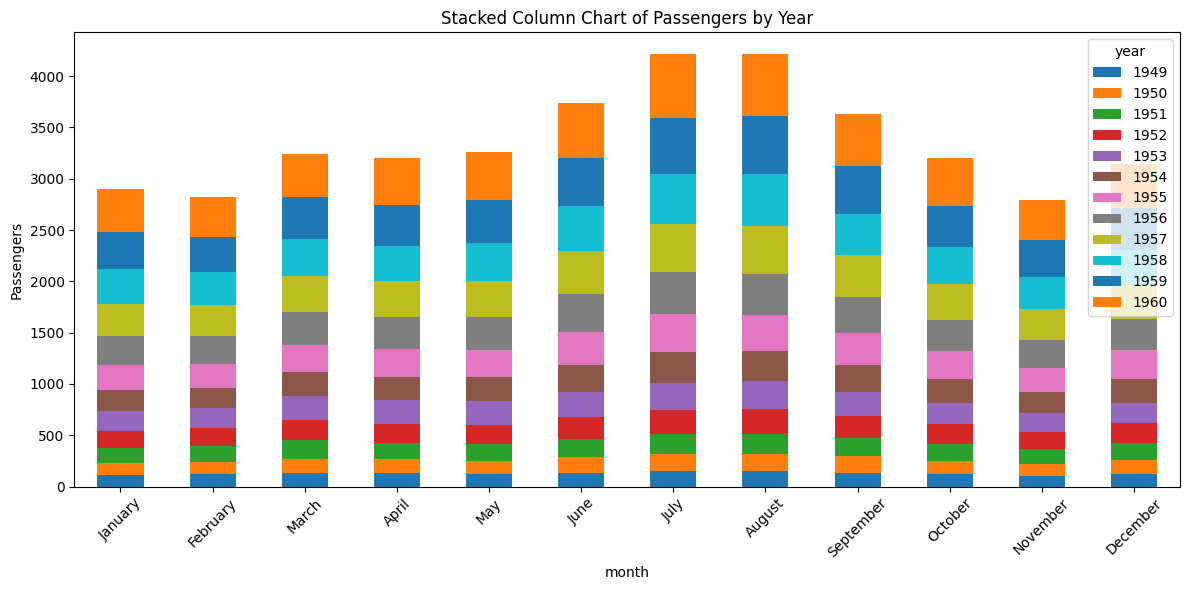

In [ ]:
pivot_table = flights_df.pivot_table(values='passengers', index='month', columns='year')

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Stacked Column Chart of Passengers by Year")
plt.ylabel("Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Stacked Bar Chart**

### 📊 Explanation
This stacked bar chart uses the transposed pivot table to show months on the y-axis and passenger counts by year.
- It's a horizontal version of the stacked column chart.
- Each stacked segment represents a month.
It’s useful for comparing annual patterns by month.

In [ ]:
pivot_table.T.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title("Stacked Bar Chart of Passengers by Month")
plt.xlabel("Passengers")
plt.tight_layout()
plt.show()

# Stacked Area **Chart**

### 📊 Explanation  
This stacked area chart visualises how the number of passengers changes **over time**, with each coloured layer representing a different **month**. The chart uses **area stacking** to show both individual monthly contributions and their **cumulative effect** year by year.

How the code works in detail:

- `pivot_table.T`  
  The pivot table is **transposed** using `.T` to switch rows and columns:
  - Initially, months were rows and years were columns.
  - After transposition, **years become the x-axis** (columns) and **months become the individual stacked layers** (rows).
  - This format is necessary for creating an area chart where the **x-axis is time (years)**.

- `.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20')`  
  This line uses the pandas `.plot()` wrapper for Matplotlib:
  - `kind='area'` creates an area chart.
  - `stacked=True` means each month's area is **layered on top** of the previous ones, rather than overlapping.
  - `figsize=(12, 6)` sets the size of the chart.
  - `colormap='tab20'` applies a colourful palette, giving each month a distinct and consistent colour.

- `plt.title("Stacked Area Chart of Passengers Over Years")`  
  Adds a clear and descriptive title to the plot.

- `plt.ylabel("Passengers")`  
  Labels the y-axis to indicate that it represents passenger numbers.

- `plt.tight_layout()`  
  Automatically adjusts padding and spacing so that the title, labels, and axes do not overlap or get cut off.


In [ ]:
pivot_table.T.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Area Chart of Passengers Over Years")
plt.ylabel("Passengers")
plt.tight_layout()
plt.show()

# Histogram **Visualisation**

### 📊 Explanation  
This histogram provides a visual representation of the **distribution of passenger counts** in the dataset. It helps answer questions like:  
- Which passenger counts occurred most frequently?
- Is the data concentrated in a specific range?
- Is the distribution symmetrical, skewed, or multimodal?

Break down the key parts of the code:

- `sns.histplot(flights_df['passengers'], bins=20, kde=True)`  
  This is the main line generating the histogram:
  - `flights_df['passengers']` is the numeric data being analysed—specifically, the number of passengers per month for each month-year combination.
  - `bins=20` splits the data into 20 equal-width intervals (or "bins"). Each bar in the histogram represents the frequency (count) of data points that fall within a given range. Increasing the number of bins makes the histogram more granular; decreasing it makes the shape smoother.
  - `kde=True` overlays a **Kernel Density Estimate (KDE)** curve—a smooth line that estimates the probability density function of the data. This helps you understand the **underlying shape of the distribution** without being restricted to fixed-width bins.

- `plt.figure(figsize=(10, 6))`  
  Sets the size of the figure to ensure the plot is large and readable.

- `plt.title("Histogram of Passengers")` and `plt.xlabel("Passengers")`  
  Add a descriptive title and label the x-axis, which represents the passenger count range.

- `plt.tight_layout()`  
  Ensures that all chart elements (title, labels, axis) are properly displayed without overlap or cutoff.


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(flights_df['passengers'], bins=20, kde=True)
plt.title("Histogram of Passengers")
plt.xlabel("Passengers")
plt.tight_layout()
plt.show()

### **Creating a Simple Count Plot** <br> A Count Plot is a type of bar plot that shows the frequency of categorical values in a dataset. It counts how many times each category appears and displays the counts as bars.

### 📊 Explanation
The count plot shows how many records exist for each month using `sns.countplot()`.
- It’s a quick way to verify data uniformity or imbalance.
- Each bar represents the number of records for that month.
Useful for basic frequency checks in categorical data.

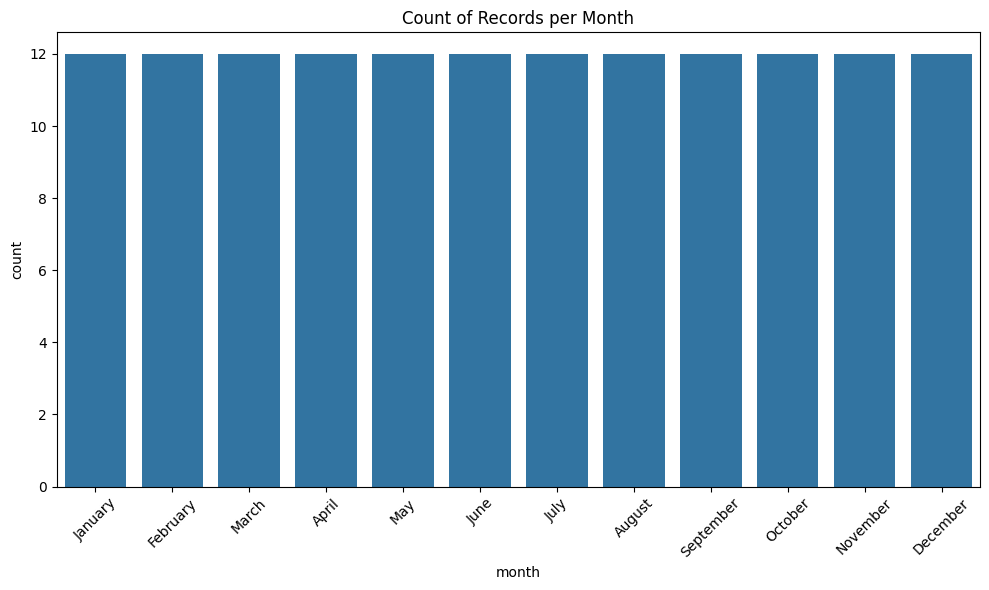

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=flights_df, x='month', order=flights_df['month'].cat.categories)
plt.title("Count of Records per Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotly **Demo**

### 📊 Explanation
This interactive line plot uses `plotly.express.line()` to visualise passengers over time by month and year.
- Interactive features include hover, zoom, and pan.
- Ideal for exploratory visualisation in dashboards or web apps.

In [ ]:
import plotly.express as px

fig = px.line(flights_df, x='month', y='passengers', color='year', title='Monthly Passengers Using Plotly')
fig.show()

# Average Passengers Per Month

### 📊 Explanation  
This line chart displays the **average number of passengers for each month** across all years in the dataset. It provides a clear view of which months consistently experience higher or lower air traffic, making it useful for identifying **seasonal travel patterns**.

Walking through the code and its purpose:

- `flights_df.pivot_table(values='passengers', index='month', aggfunc='mean', observed=False)`  
  This creates a **pivot table** that:
  - Uses `'passengers'` as the value to be aggregated.
  - Uses `'month'` as the row index, so each row represents a month.
  - Uses `aggfunc='mean'` to compute the **average number of passengers per month** across all years.
  - `observed=False` ensures all months are retained, even if categorical.

- `avg_per_month.reindex([...])`  
  Since months may appear in alphabetical order by default, this line **reorders the index** so that months appear in **chronological order** from January to December. This is essential for correct interpretation of trends over the calendar year.

- `avg_per_month.plot(kind='line', legend=False, marker='o')`  
  - Plots the monthly averages as a line chart.
  - `marker='o'` adds a circular marker at each data point to enhance readability.
  - `legend=False` hides the legend since there's only one line being plotted.

- `plt.title("Average Number of Passengers per Month")` and `plt.ylabel("Average Passengers")`  
  These add a clear title and label to the y-axis to indicate what the chart is showing.

- `plt.xticks(rotation=45)`  
  Rotates month labels for better readability, especially on smaller screens or prints.

- `plt.tight_layout()`  
  Automatically adjusts the layout to prevent any overlap between elements.

In [ ]:
avg_per_month = flights_df.pivot_table(values='passengers', index='month', aggfunc='mean', observed=False)
avg_per_month = avg_per_month.reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                       'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(10, 5))
avg_per_month.plot(kind='line', legend=False, marker='o')
plt.title("Average Number of Passengers per Month")
plt.ylabel("Average Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total Passengers Per Year

### 📊 Explanation  
This bar chart visualises the **total number of airline passengers per year** by aggregating the data using a pivot table. It allows you to observe trends over time and compare overall passenger volume across different years.

Break down how the code works:

- `total_per_year = flights_df.pivot_table(values='passengers', index='year', aggfunc='sum', observed=False)`  
  This line creates a pivot table where:
  - Each row represents a year.
  - The `passengers` values are **summed** for each year using `aggfunc='sum'`.
  - The result shows the **total number of passengers in each year** across all months.

- `total_per_year.plot(kind='line', legend=False, marker='o')`  
  This line generates a **line chart** (even though it's titled "bar chart" in the description—it's technically a line chart here):
  - `kind='line'` tells pandas to plot a line graph.
  - `legend=False` hides the legend, as it's not needed for a single line.
  - `marker='o'` places a circular marker on each year’s data point, making individual values easier to read and compare.

- `plt.title("Total Number of Passengers per Year")` and `plt.ylabel("Total Passengers")`  
  These add a meaningful title and a y-axis label to describe the metric being shown.

- `plt.xticks(rotation=45)` ensures that year labels are rotated for readability.

- `plt.tight_layout()` automatically adjusts spacing to ensure all labels and titles are visible and not overlapping.

In [ ]:
# Calculate total passengers per year
total_per_year = flights_df.pivot_table(values='passengers', index='year', aggfunc='sum', observed=False)

# Plot the line chart
plt.figure(figsize=(10, 5))
total_per_year.plot(kind='line', legend=False, marker='o')
plt.title("Total Number of Passengers per Year")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Month with Maximum Passengers Each Year

### 📊 Explanation  
This grouped bar chart highlights the **month with the highest number of passengers** for **each year** in the dataset. It is a powerful visual for spotting **peak travel periods** and observing how those peaks shift (or remain consistent) over time.

Break down the logic behind the code:

- `flights_df.groupby('year')['passengers'].idxmax()`  
  This line identifies the row index (within each year group) that corresponds to the **maximum passenger count**:
  - `groupby('year')` groups the data by year.
  - `['passengers'].idxmax()` returns the index of the row that holds the highest value for the `passengers` column in each group.
  - The result is one row per year, pointing to the month with the most passengers that year.

- `flights_df.loc[...]`  
  This extracts the **actual rows** corresponding to the peak passenger months for each year using the indices returned by `idxmax()`.

- `sns.barplot(data=max_months, x='year', y='passengers', hue='month')`  
  This creates a **grouped bar chart** using Seaborn:
  - `x='year'` places each year on the x-axis.
  - `y='passengers'` sets the height of each bar to the number of passengers.
  - `hue='month'` uses colour to differentiate which **month** had the maximum passengers that year.
  - This helps you quickly see whether certain months (e.g., July or August) are consistently peak months across different years.

- `plt.title(...)` adds a meaningful chart title.
- `plt.tight_layout()` ensures proper spacing between chart elements.

In [ ]:
max_months = flights_df.loc[flights_df.groupby('year')['passengers'].idxmax()]

plt.figure(figsize=(10, 5))
sns.barplot(data=max_months, x='year', y='passengers', hue='month')
plt.title("Month with Maximum Passengers for Each Year")
plt.tight_layout()
plt.show()

# Passenger Range (Max - Min) Per Year

### 📊 Explanation  
This line chart visualises the **range of monthly passenger counts for each year**, calculated as the difference between the **maximum** and **minimum** values within each year. It provides a measure of **variability**, helping to understand how much passenger numbers fluctuate month-to-month within each year.

Break down the code:

- `flights_df.groupby('year')['passengers'].agg(lambda x: x.max() - x.min())`  
  This line calculates the **range** for each year:
  - `groupby('year')` groups the data by year.
  - For each group (i.e., year), the lambda function:
    - Takes the **maximum** monthly passenger count (`x.max()`)
    - Subtracts the **minimum** monthly passenger count (`x.min()`)
    - The result is the **range** (i.e., the spread) of passenger counts within that year.
  - This range reflects how much variation there was in monthly traffic throughout each year.

- `range_by_year.plot(kind='line', marker='o')`  
  Plots the resulting range values as a line chart:
  - `kind='line'` creates the line plot.
  - `marker='o'` places a circular marker on each data point for clarity.

- `plt.title("Range of Passengers (Max - Min) per Year")` and `plt.ylabel("Passenger Range")`  
  Provide clear context for the chart with a descriptive title and axis label.

- `plt.xticks(rotation=45)`  
  Rotates the year labels to improve readability.

- `plt.tight_layout()` ensures a clean layout without overlapping elements.

In [ ]:
range_by_year = flights_df.groupby('year')['passengers'].agg(lambda x: x.max() - x.min())

plt.figure(figsize=(10, 5))
range_by_year.plot(kind='line', marker='o')
plt.title("Range of Passengers (Max - Min) per Year")
plt.ylabel("Passenger Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()